# Melodic similarity and distance metrics

## Description


Notebook prepared by Philip Tovstogan for MIR course

In [16]:
# Import modules
import os
import numpy as np
import matplotlib.pyplot as plt
import music21 as m21
%matplotlib inline

In [13]:
m21.environment.set('autoDownload', 'allow')
url = 'http://kern.humdrum.org/cgi-bin/ksdata?file=ukrain10.krn&l=essen/europa/ukraina&format=kern'
sAlt = m21.converter.parse(url)

humdrum.spineParser: WARNING: Error in parsing event ('*MX') at position 10 for spine None: ('Incorrect meter: %s found', '*MX')


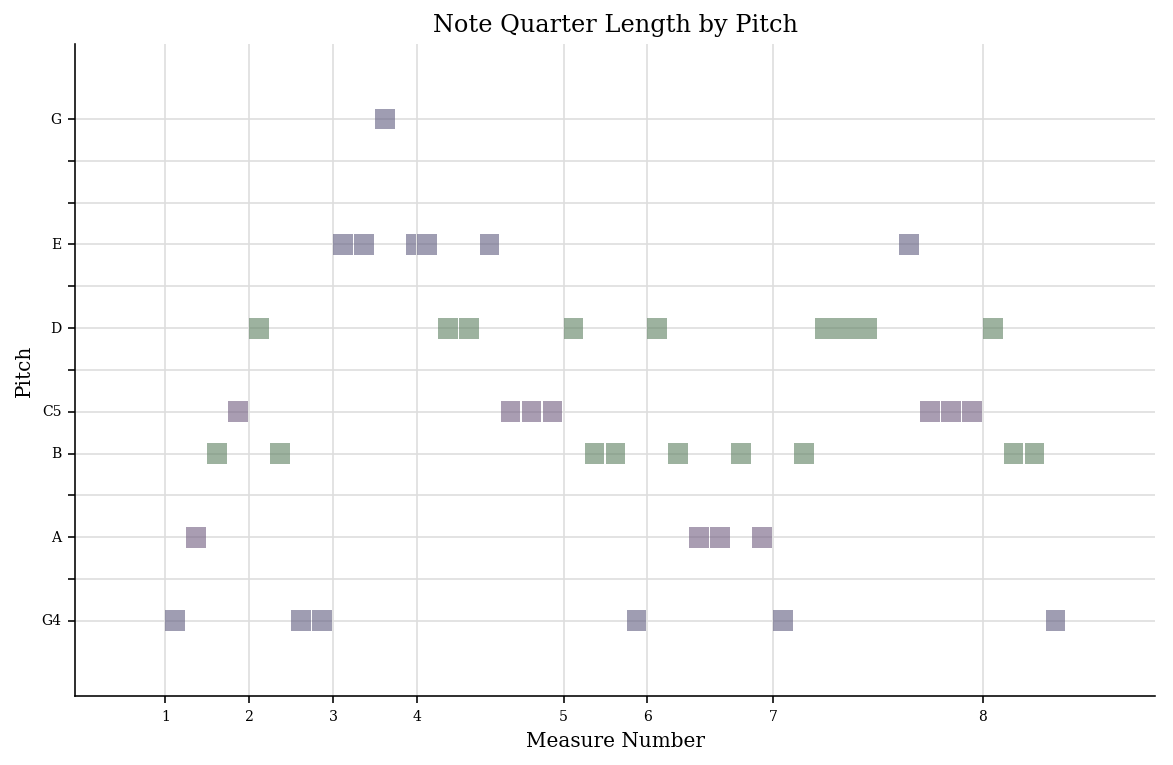

In [19]:
sAlt.measures(1,8).plot()

In [4]:
# Init vars and parameters
subset_size = 5
algorithm = "2015-shapetime"  # latest ones are: 2015-shapeh, 2015-time, 2015-shapetime

files = !ls midi
# files = np.random.permutation(files)[:subset_size]  # uncomment this line if you want to use subset of all files

In [5]:
# Calculate distances
total = len(files)
indices = {files[i]: i for i in range(total)}
distances = np.zeros((total, total))

output = !java -jar bin/melodyshape-1.4.jar -q midi -c midi -a 2015-shapetime
for line in output:
    f1, f2, distance = line.split()
    if f1 in indices and f2 in indices:
        distances[indices[f1], indices[f2]] = distance

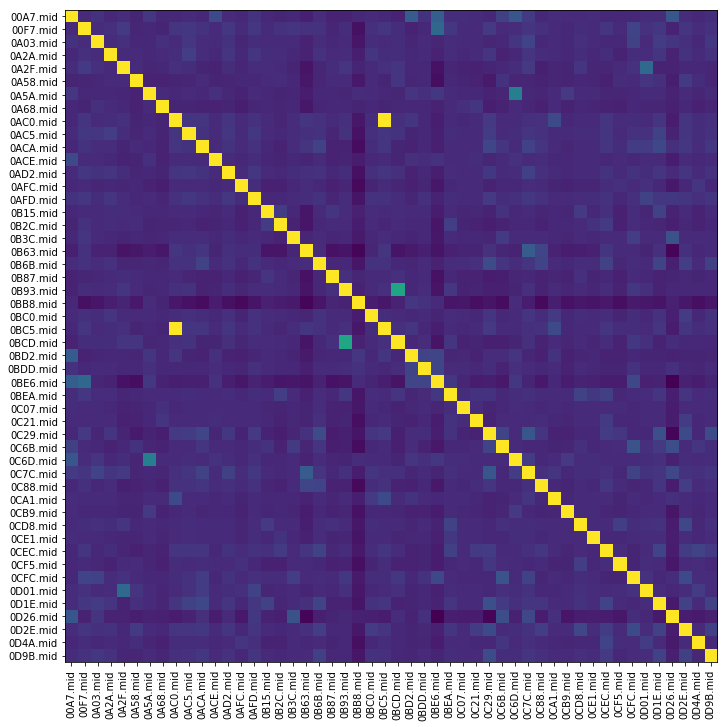

In [6]:
# Plot
plt.figure(figsize=(12, 12))
plt.imshow(distances)
ax = plt.gca()

ax.set_yticks(np.arange(total), minor=False)
ax.set_yticklabels(files)

ax.set_xticks(np.arange(total), minor=False)
ax.set_xticklabels(files, rotation='vertical')

plt.show()

In [7]:
# Find most similar melodies
x = np.copy(distances)
x[np.tril_indices(total)] = -np.infty # discard lower triangle with diagonal

indices = np.argsort(x, axis=None) # indices of sorted array
indices = np.unravel_index(indices, x.shape)

num_top = 3
print("Top {} most similar melodies:".format(num_top))

for i in range(num_top):
    print("- {} and {}".format(files[indices[0][-i-1]], files[indices[1][-i-1]]))

Top 3 most similar melodies:
- 0AC0.mid and 0BC5.mid
- 0B93.mid and 0BCD.mid
- 0A5A.mid and 0C6D.mid
